# Canalization

Canalization is a key property of biological Boolean functions that confers
robustness: when a canalizing variable takes its canalizing value, the output
is determined regardless of other inputs. This "buffering" mechanism is thought
to protect organisms from genetic and environmental perturbations.

Discovered by C.H. Waddington in 1942 in developmental biology, canalization
has since been formalized in Boolean network theory and found to be prevalent
in empirically-derived gene regulatory networks.

## What you will learn
In this tutorial you will:

- determine if a Boolean function is canalizing, $k$-canalizing, and nested canalizing,
- compute the canalizing layer structure of any Boolean function,
- compute properties related to collective canalization, such as canalizing strength, 
effective degree and input redundancy.

## Setup

In [1]:
import boolforge
import matplotlib.pyplot as plt

## Canalizing variables and layers

A Boolean function $f(x_1, \ldots, x_n)$ is *canalizing* if there exists at least one
*canalizing variable* $x_i$ and a *canalizing input value* $a \in \{0,1\}$ such that

$$
f(x_1,\ldots,x_i=a,\ldots,x_n)=b,
$$

where $b \in \{0,1\}$ is a constant, the *canalized output*.

A Boolean function is *k-canalizing* if it has at least k conditionally canalizing variables. 
This is checked recursively: after fixing a canalizing variable $x_i$ to its non-canalizing input value $\bar a$, 
the subfunction $f(x_1,\ldots,x_{i-1},x_{i+1},\ldots,x_n)$ must itself contain another canalizing variable, and so on. 
For a given function, the maximal possible value of k is defined as its *canalizing depth*. 
If all variables are conditionally canalizing (i.e., if the canalizing depth is $n$), 
the function is called a *nested canalizing* function (*NCF*). 
Biological networks are heavily enriched for NCFs as we explore in a later tutorial.

Per (He and Macauley, Physica D, 2016), any Boolean function can be decomposed 
into a unique standard monomial form by recursively identifying and removing all 
conditionally canalizing variables (this set of variables is called a *canalizing layer*). 
Each variable of a Boolean function appears in exactly one layer, 
or (if it is not conditionally canalizing) it is part of the non-canalizing core function 
that has to be evaluated only if all conditionally canalizing variables receive their non-canalizing input value. 
The *canalizing layer structure* $[k_1,\ldots,k_r]$ describes the number of variables in each canalizing layer. 
We thus have $r\geq 0$, $k_i\geq 1$ and $k_1+\cdots+k_r$.

In the following code, we define four 3-input functions with different canalizing properties.

In [2]:
# Non-canalizing XOR function
f = boolforge.BooleanFunction("(x0 + x1 + x2) % 2")

# 1-canalizing function
g = boolforge.BooleanFunction("(x0 | (x1 & x2 | ~x1 & ~x2)) % 2")

# Nested canalizing function with all variables in one layer
h = boolforge.BooleanFunction("~x0 & x1 & x2")

# Nested canalizing function with two canalizing layers
k = boolforge.BooleanFunction("x0 | (x1 & x2)")

labels = ["f", "g", "h", "k"]
boolforge.display_truth_table(f, g, h, k, labels=labels)

x0	x1	x2	|	f	g	h	k
---------------------------------------------------------
0	0	0	|	0	1	0	0
0	0	1	|	1	0	0	0
0	1	0	|	1	0	0	0
0	1	1	|	1	1	1	1
1	0	0	|	1	1	0	1
1	0	1	|	1	1	0	1
1	1	0	|	1	1	0	1
1	1	1	|	1	1	0	1


### Canalizing depth and nested canalization

For each function, we can determine whether it is canalizing and/or nested canalizing. 
This is determined by the canalizing depth (the number of conditionally canalizing variables), 
which we can also directly compute. 
As a reminder, an $n$-input function is canalizing if 
its canalizing depth is non-zero and nested canalizing if its canalizing depth equals $n$.

In [3]:
for func, label in zip([f, g, h, k], labels):
    depth = func.get_canalizing_depth()
    print(f"Canalizing depth of {label}: {depth}")

    print(f"{label} is canalizing:", func.is_canalizing())
    print(f"{label} is nested canalizing:", func.is_k_canalizing(k=func.n))
    print()

Canalizing depth of f: 3
f is canalizing: True
f is nested canalizing: True

Canalizing depth of g: 1
g is canalizing: True
g is nested canalizing: False

Canalizing depth of h: 3
h is canalizing: True
h is nested canalizing: True

Canalizing depth of k: 3
k is canalizing: True
k is nested canalizing: True



### Canalizing layer structure

The full canalizing layer structure includes canalizing input values, canalized
output values, the order of canalizing variables, the layer structure, and the
remaining non-canalizing core function.

In [4]:
for func, label in zip([f, g, h, k], labels):
    info = func.get_layer_structure()
    print(f"Canalizing input values of {label}: {info['CanalizingInputs']}")
    print(f"Canalized output values of {label}: {info['CanalizedOutputs']}")
    print(f"Order of canalizing variables of {label}: {info['OrderOfCanalizingVariables']}")
    print(f"Layer structure of {label}: {info['LayerStructure']}")
    print(f"Number of layers of {label}: {info['NumberOfLayers']}")
    print(f"Core function of {label}: {info['CoreFunction']}")
    print()

Canalizing input values of f: [1 1 1]
Canalized output values of f: [1 1 1]
Order of canalizing variables of f: [0 1 2]
Layer structure of f: [3]
Number of layers of f: 1
Core function of f: [0]

Canalizing input values of g: [1]
Canalized output values of g: [1]
Order of canalizing variables of g: [0]
Layer structure of g: [1]
Number of layers of g: 1
Core function of g: [1 0 0 1]

Canalizing input values of h: [1 0 0]
Canalized output values of h: [0 0 0]
Order of canalizing variables of h: [0 1 2]
Layer structure of h: [3]
Number of layers of h: 1
Core function of h: [1]

Canalizing input values of k: [1 0 0]
Canalized output values of k: [1 0 0]
Order of canalizing variables of k: [0 1 2]
Layer structure of k: [1, 2]
Number of layers of k: 2
Core function of k: [1]



Consider, for example, the output for `k`. The canalizing input values corresponding to
$x_0, x_1, x_2$ are $1,0,0$, respectively, with the same canalized outputs. That is,

- Layer 1: $x_0$ (if $x_0=1$, then $k=1$, regardless of $x_1$ and $x_2$)
- Layer 2: $x_1, x_2$ (if $x_0=0$ and $x_1=0$ or $x_2=0$, then $k=0$)

## Collective canalization

Collective canalization treats canalization as a property of the function rather
than individual variables (Reichhardt & Bassler, J. Phys. A, 2007). 
Individual canalization asks: "Which *single* variables can determine output?"
Collective canalization asks: "Which *sets* of variables can determine output?"

A Boolean function is *$k$-set canalizing* if there exists a set of $k$ variables
whose fixed values determine the output irrespective of the remaining inputs.

Consider, for example, the function $k(x_0,x_1,x_2) = x_0 \vee (x_1 \wedge x_2)$.
This function is 2-set canalizing because

- $\{x_0,x_1\}$ can determine the output: if $(x_0,x_1)=(1,0)$, $k=1$ ($x_2$ irrelevant), or
- $\{x_1,x_2\}$ can determine the output: if $(x_1,x_2)=(1,1)$, $k=1$ ($x_0$ irrelevant)

The proportion of such $k$-sets, the $k$-set canalizing proportion denoted $P_k(f)$, is used to define the canalizing strength.
It is fairly obvious that

- nested canalizing functions of a single layer such as `h` are the non-degenerate functions with highest k-set canalizing proportion $P_k(f) = 1-1/2^k$, and
- $P_{k-1}(f) \leq P_k(f)$, i.e., more knowledge about a function's inputs cannot result in less knowledge about its output,
- the $n-1$-set canalizing proportion $P_{n-1}(f)$ is 1 minus the function's normalized average sensitivity.

We can compute the $k$-set canalizing proportions for the four 3-input functions:

In [5]:
for func, label in zip([f, g, h, k], labels):
    print(f"1-set canalizing proportion of {label}: {func.get_kset_canalizing_proportion(k=1)}")
    print(f"2-set canalizing proportion of {label}: {func.get_kset_canalizing_proportion(k=2)}")
    print(f"Normalized average sensitivity of {label}: {func.get_average_sensitivity(exact=True, normalized=True)}")
    print(f"3-set canalizing proportion of {label}: {func.get_kset_canalizing_proportion(k=3)}")
    print()

1-set canalizing proportion of f: 0.5
2-set canalizing proportion of f: 0.75
Normalized average sensitivity of f: 0.25
3-set canalizing proportion of f: 1.0

1-set canalizing proportion of g: 0.16666666666666666
2-set canalizing proportion of g: 0.5
Normalized average sensitivity of g: 0.5
3-set canalizing proportion of g: 1.0

1-set canalizing proportion of h: 0.5
2-set canalizing proportion of h: 0.75
Normalized average sensitivity of h: 0.25
3-set canalizing proportion of h: 1.0

1-set canalizing proportion of k: 0.16666666666666666
2-set canalizing proportion of k: 0.5833333333333334
Normalized average sensitivity of k: 0.4166666666666667
3-set canalizing proportion of k: 1.0



### Canalizing strength

The *canalizing strength* summarizes collective canalization as a weighted average of
the $k$-set canalizing proportions (Kadelka et al., Adv Appl Math, 2023). It ranges from:

- 1 for maximally canalizing non-degenerate functions (namely, nested canalizing functions of a single canalizing layer such as `h`),
- 0 for linear functions such as `f`,

For all other non-degenerate Boolean functions it is within $(0,1)$.

It helps to consider the canalizing strength as a probability: 
Given that I know a random number of function inputs (drawn uniformly at random from $1,\ldots,n-1$), 
how likely am I to already know the function output?

In [6]:
for func, label in zip([f, g, h, k], labels):
    strength = func.get_canalizing_strength()
    print(f"Canalizing strength of {label}: {strength}")
    print()

Canalizing strength of f: 1.0

Canalizing strength of g: 0.5

Canalizing strength of h: 1.0

Canalizing strength of k: 0.5555555555555556



### Distribution of canalizing strength

An enumeration of all non-degenerate 3-input Boolean functions reveals the distribution of the canalizing strength. 
Note that this brute-force code can also run (in less than a minute) for all $2^{2^4}=2^{16}=65,536$ 
4-input functions but will take days for all $2^{2^5}=2^{32}=4,294,967,296$ 5-input functions.

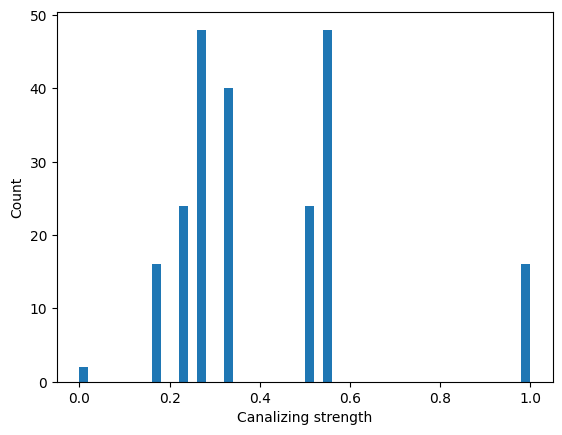

In [7]:
n = 3
all_functions = boolforge.get_left_side_of_truth_table(2**n)

canalizing_strengths = []
for binary_vector in all_functions:
    func = boolforge.BooleanFunction(f=binary_vector)
    if not func.is_degenerate():
        canalizing_strengths.append(func.get_canalizing_strength())

fig, ax = plt.subplots()
ax.hist(canalizing_strengths, bins=50)
ax.set_xlabel("Canalizing strength")
ax.set_ylabel("Count")
plt.show()

## Canalization as a measure of input redundancy

Canalization, symmetry and redundancy are related concepts. 
A highly symmetry Boolean function with few (e.g., one) symmetry groups
exhibits high input redundancy and is on average more canalizing, irrespective of the measure of canalization. 
Recently, it was shown that almost all Boolean functions (except the linear functions)
exhibit some level of *input redundancy* (Gates et al., PNAS, 2021). 
The input redundancy of a variable is defined as 1 minus its *edge effectiveness*, 
which describes the proportion of times that this variable is needed to determine the output of the function. 
Edge effectiveness is very similar to the activity of a variable 
but is not the same (the difference is defined as *excess canalization*).
The sum of all edge effectiveness values of the inputs of a function is known as its *effective degree*.
The average input redundancy serves as a measure of the canalization in a function.

`BoolForge` can compute all these quantities. To use this functionality, 
the optional `CANA` package must be installed (`pip install cana` or `pip install boolforge[cana]`). 
To exemplify this, reconsider the four 3-input functions from above.

In [8]:
for func, label in zip([f, g, h, k], labels):
    edge_eff = func.get_edge_effectiveness()
    activities = func.get_activities()
    effective_degree = func.get_effective_degree()
    input_redundancy = func.get_input_redundancy()

    print(f"Edge effectiveness of {label}: {edge_eff}")
    print(f"Activities of {label}: {activities}")
    print(f"Excess canalization of {label}: {edge_eff - activities}")
    print(f"Effective degree of {label}: {effective_degree}")
    print(f"Average edge effectiveness of {label}: {effective_degree / func.n}")
    print(f"Normalized input redundancy of {label}: {input_redundancy}")
    print()

Edge effectiveness of f: [0.41666666666666663, 0.41666666666666663, 0.41666666666666663]
Activities of f: [0.2504 0.2444 0.2515]
Excess canalization of f: [0.16626667 0.17226667 0.16516667]
Effective degree of f: 1.25
Average edge effectiveness of f: 0.4166666666666667
Normalized input redundancy of f: 0.5833333333333334

Edge effectiveness of g: [0.625, 0.625, 0.625]
Activities of g: [0.5015 0.4986 0.4986]
Excess canalization of g: [0.1235 0.1264 0.1264]
Effective degree of g: 1.875
Average edge effectiveness of g: 0.625
Normalized input redundancy of g: 0.375

Edge effectiveness of h: [0.41666666666666663, 0.41666666666666663, 0.41666666666666663]
Activities of h: [0.2565 0.2529 0.2505]
Excess canalization of h: [0.16016667 0.16376667 0.16616667]
Effective degree of h: 1.25
Average edge effectiveness of h: 0.4166666666666667
Normalized input redundancy of h: 0.5833333333333334

Edge effectiveness of k: [0.8125, 0.375, 0.375]
Activities of k: [0.7551 0.2473 0.2525]
Excess canalization

## Summary and next steps

In this tutorial you learned how to:

- compute canalizing depth and identify nested canalizing functions,
- compute the canalizing layer structure and interpret layers and core functions,
- quantify collective canalization via $k$-set canalizing proportions,
- summarize canalization via canalizing strength,
- relate canalization to redundancy-based measures such as edge effectiveness.

Canalization provides a structural explanation for why many biological Boolean
rules are robust to perturbations.

**Next steps:** Subsequent tutorials will explore random Boolean functions with
prescribed canalization properties and the impact of canalization on Boolean
network dynamics and robustness.